# Comparing Ketamine and Midazolam after treatment in ROIs
- Analysis in HPC
- focus on end of treatment
- Amygdala
- vmPFC
- Hippocampus

#### Small explanation for the code for future reference (as it is a bit messy)
- I take all functional files of trauma vs relaxed first script first 1min
- I mask for amygdala - run analysis per session (1,2,3) and calculate effect (using pyMC3)
- I mask for vmPFC and do the same
- I mask for hippocampus and do the same
- Effect reported are amygdala and hippocampus show sig. difference in the post treatment scan. Amygdala shows effect in 30 days f/u hipocampus doesn't. vmPFC and OFC doesn't show anything.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import relevant packages
import glob
import numpy as np
import scipy
import nilearn
import nilearn.image
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [33]:
# Set session
ses = 3
## Grab group
# compare between groups

medication_cond = pd.read_csv('/home/oad4/ketamine_reconsolidation/kpe_sub_condition.csv')

func_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/kpe/results/ScriptPart_ses%s/modelfit/_subject_id_*/modelestimate/results/zstat7.nii.gz' %(ses))

func_files.sort()
len(func_files)

22

In [23]:
# remove 1315
del func_files[6] #(only session 1,2)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


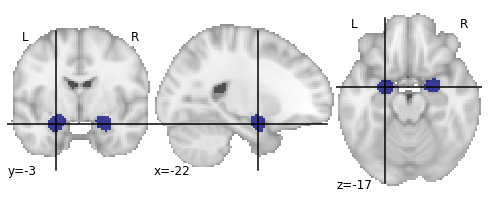

In [34]:
## Amygdala as mask
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=25", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)


masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                                smoothing_fwhm=None, standardize=False,
                                        detrend=False, verbose=9).fit()

In [35]:
t_arr = []
mean_act = []
scr_id = []
#delayed_get_data = dask.delayed(masker.fit_transform)
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.transform(func)
    t_arr.append(np.mean(t_map, axis=1)[0])
    


[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. 

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.transform_single_imgs] Loading data 

In [15]:
df_ses1 = []
df_ses1 = pd.DataFrame({'scr_id': scr_id, 'amg1': t_arr})
df_ses1 = pd.merge(medication_cond, df_ses1)
df_ses1 = df_ses1.rename(columns={'med_cond': 'group'})
df_ses1 = df_ses1.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})
#df['group'] = medication_cond['med_cond']

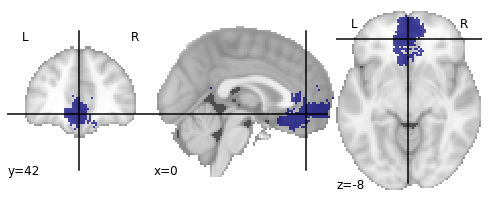

In [37]:
# now lets do the same with vmPFC
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/vmpfc_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=5", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=None,
                                        standardize=False, detrend=False, verbose=5)

In [38]:
mean_act_vmpfc = []
scr_id = []
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.fit_transform(func)
    
    average = np.mean(np.array(t_map))
    mean_act_vmpfc.append(average)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_si

[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.tra

In [39]:
#df_ses1['vmpfc1'] = mean_act_vmpfc
#df_ses2['vmpfc2'] = mean_act_vmpfc
df_ses3['vmpfc3'] = mean_act_vmpfc

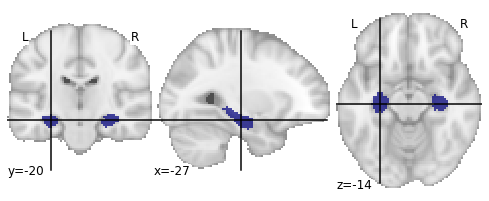

In [40]:
## Hippocampus
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/hippocampus_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=15", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=None,
                                        standardize=False, detrend=False, verbose=5)

In [41]:
mean_act_hippo = []
scr_id = []
for func in func_files:
    # get subject number
    scr_id.append('KPE' + func.split('id_')[1].split('/')[0])
    # get average activation
    t_map = masker.fit_transform(func)
    
    average = np.mean(np.array(t_map))
    mean_act_hippo.append(average)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_si

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_s

In [42]:
#df_ses1['hippo1'] = mean_act_hippo
#df_ses2['hippo2'] = mean_act_hippo
df_ses3['hippo3'] = mean_act_hippo

In [36]:
df_ses3 = []
df_ses3 = pd.DataFrame({'scr_id': scr_id, 'amg3': t_arr})
df_ses3 = pd.merge(medication_cond, df_ses3)
df_ses3 = df_ses3.rename(columns={'med_cond': 'group'})
#df['group'] = medication_cond['med_cond']
df_ses3 = df_ses3.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

In [26]:
df_ses2 = []
df_ses2 = pd.DataFrame({'scr_id': scr_id, 'amg2': t_arr})
df_ses2 = pd.merge(medication_cond, df_ses2)
df_ses2 = df_ses2.rename(columns={'med_cond': 'group'})
#df['goup'] = medication_cond['med_cond']
df_ses2 = df_ses2.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

In [ ]:
df_ses1 = []
df_ses1 = pd.DataFrame({'scr_id': scr_id, 'meanAct_ses1': average[0]})
df_ses1 = pd.merge(medication_cond, df_ses1)
df_ses1 = df_ses1.rename(columns={'med_cond': 'group'})
#df['group'] = medication_cond['med_cond']
df_ses1 = df_ses1.replace(to_replace={'group': {0.0:'midazolam', 1.0:'ketamine'}})

In [ ]:
group = {'ketamine': 1,'midazolam': 0} 
df_ses3['groupIdx'] =[group[item] for item in df_ses3.group] 

## Combine all three sessions

In [43]:
df = pd.merge(df_ses1, df_ses2, how='left')
df = pd.merge(df, df_ses3, how='left') # adding that to avoid removing Nan subjects
#df = pd.merge(df, df_ses4, how='left')
# add index for group (0 and 1)
group = {'ketamine': 1,'midazolam': 0} 
df['groupIdx'] =[group[item] for item in df.group] 
# save the dataframe
df.to_csv('amg_TraumavsNeutral.csv', index = False)

In [44]:
df

,scr_id,group,amg1,vmpfc1,hippo1,amg2,vmpfc2,hippo2,amg3,vmpfc3,hippo3,groupIdx
0,KPE008,ketamine,0.384864,0.229618,0.464944,-0.004718,0.055739,-0.103985,-0.161639,0.082844,0.024848,1
1,KPE1223,ketamine,0.072214,0.418279,0.088564,0.378194,0.339514,0.500000,-0.481505,-0.358363,-0.273069,1
2,KPE1253,midazolam,-0.142767,-0.087617,-0.182786,-0.152882,0.163191,-0.042934,NaN,NaN,NaN,0
3,KPE1263,midazolam,-0.254799,-0.381604,-0.387857,0.156226,0.212869,0.419635,0.637342,0.013076,0.340618,0
4,KPE1293,ketamine,-0.054429,0.175758,0.085905,-0.179461,-0.203011,-0.389833,-0.167421,-0.322562,-0.116530,1
5,KPE1307,ketamine,-0.678179,-1.529759,-0.496274,-0.702461,-0.718012,-0.310219,-0.285501,0.287385,0.036338,1
6,KPE1322,ketamine,0.533188,1.284006,0.213347,0.133740,0.796530,0.114281,-0.721853,0.093315,-0.353878,1
7,KPE1339,ketamine,-0.138400,-0.272918,-0.164439,-0.167867,0.002748,-0.173311,-0.213974,0.011711,0.045991,1
8,KPE1343,ketamine,-0.760030,-0.971054,-0.080083,-0.593653,-0.087525,-0.557004,-0.598367,-0.236886,-0.399978,1
9,KPE1351,midazolam,-0.344641,0.220982,-0.353681,-0.292027,-0.914481,-0.961320,-0.060776,-0.053048,0.137479,0
